# Introdução

Nesta aula, vamos explorar conceitos fundamentais de aprendizado de máquina, começando com um problema de classificação. Utilizaremos dois modelos AdaBoost para entender a diferença de performance entre um modelo mais simples e outro mais complexo, discutindo fenômenos como overfitting e a importância da calibração. Em seguida, estudaremos fenômenos curiosos em alta dimensão, como o comportamento do volume de uma esfera de raio unitário à medida que a dimensão aumenta.

## Classificando coisas

Neste código, vamos comparar dois modelos AdaBoost para um problema de classificação. O Modelo 1 usará árvores de decisão rasas, enquanto o Modelo 2 terá árvores mais profundas, com o objetivo de observar o impacto disso no desempenho.

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Gerar dataset sintético
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# 2. Separação dos dados em treino (60%), calibração (20%) e teste (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_calibration, X_test, y_calibration, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 3. Treinamento dos modelos AdaBoost

# Modelo 1: AdaBoost com árvores de decisão rasas (default)
adaboost_default = AdaBoostClassifier(random_state=42)
adaboost_default.fit(X_train, y_train)

# Modelo 2: AdaBoost com árvores de decisão mais profundas (max_depth=10)
adaboost_deep = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=10),  # Árvores mais profundas
    random_state=42
)
adaboost_deep.fit(X_train, y_train)

# 4. Avaliação dos modelos no conjunto de calibração

# Avaliação do Modelo 1 (AdaBoost padrão)
y_calibration_pred_default = adaboost_default.predict(X_calibration)
acc_default_calibration = (y_calibration == y_calibration_pred_default).mean()

# Avaliação do Modelo 2 (AdaBoost com árvores profundas)
y_calibration_pred_deep = adaboost_deep.predict(X_calibration)
acc_deep_calibration = (y_calibration == y_calibration_pred_deep).mean()

# 5. Avaliação dos modelos no conjunto de treino e teste

# Para o Modelo 1 (AdaBoost padrão)
y_train_pred_default = adaboost_default.predict(X_train)
y_test_pred_default = adaboost_default.predict(X_test)
acc_default_train = (y_train == y_train_pred_default).mean()
acc_default_test = (y_test == y_test_pred_default).mean()

# Para o Modelo 2 (AdaBoost com árvores profundas)
y_train_pred_deep = adaboost_deep.predict(X_train)
y_test_pred_deep = adaboost_deep.predict(X_test)
acc_deep_train = (y_train == y_train_pred_deep).mean()
acc_deep_test = (y_test == y_test_pred_deep).mean()

# 6. Exibir as performances dos dois modelos em um DataFrame
performance_comparison_df = pd.DataFrame({
    "Conjunto": ["Treino", "Calibração", "Teste"],
    "Modelo 1 (Padrão)": [acc_default_train, acc_default_calibration, acc_default_test],
    "Modelo 2 (Árvore Mais Profunda)": [acc_deep_train, acc_deep_calibration, acc_deep_test]
})

/home/thiagorr/.cache/pypoetry/virtualenvs/prog-stat-FyLUkzbW-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/thiagorr/.cache/pypoetry/virtualenvs/prog-stat-FyLUkzbW-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [2]:
# Exibir o DataFrame
performance_comparison_df

,Conjunto,Modelo 1 (Padrão),Modelo 2 (Árvore Mais Profunda)
0,Treino,0.933333,1.000
1,Calibração,0.850000,0.775
2,Teste,0.800000,0.800


### O que aconteceu?

Por que o **Modelo 2**, que utiliza árvores mais complexas, apresentou uma diferença de desempenho entre os conjuntos de treino e calibração/teste? Que fatores podem estar contribuindo para essa variação nos resultados?


## Dimensão alta e coisas estranhas

Para explorar o comportamento do volume da esfera em dimensões maiores, clique no botão abaixo.

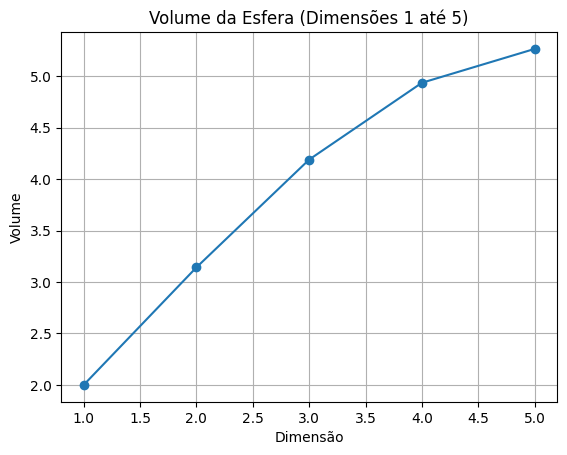

In [3]:
import scipy.special as sp

# Função para calcular o volume de uma esfera
def volume_of_sphere(dim):
    return (np.pi ** (dim / 2)) / sp.gamma(dim / 2 + 1)

# 1. Plotar gráfico para dimensões de 1 até 5
dimensions_small = np.arange(1, 6)
volumes_small = [volume_of_sphere(dim) for dim in dimensions_small]

plt.figure()
plt.plot(dimensions_small, volumes_small, marker='o')
plt.title("Volume da Esfera (Dimensões 1 até 5)")
plt.xlabel("Dimensão")
plt.ylabel("Volume")
plt.grid(True)
plt.show()

### O que acontece quando a dimensão aumenta?

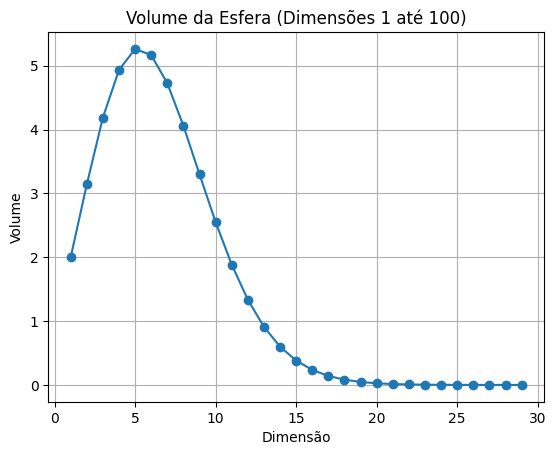

In [5]:
dimensions_large = np.arange(1, 30)
volumes_large = [volume_of_sphere(dim) for dim in dimensions_large]

plt.figure()
plt.plot(dimensions_large, volumes_large, marker='o')
plt.title("Volume da Esfera (Dimensões 1 até 100)")
plt.xlabel("Dimensão")
plt.ylabel("Volume")
plt.grid(True)
plt.show()